# Metrics for comparing prediction error in models

## **Part 1:** Metrics for Classification models

### Accuracy

In [1]:
# Metrics module allows you define particular metrics
import numpy as np
from sklearn.metrics import accuracy_score

# We are comparing predictions from a model to the known values
y_true = [1, 1, 1, 0]
y_pred = [0, 1, 1, 1]

# Proportion of y_true predicted correctly
print(accuracy_score(y_true, y_pred))

# If normalize=False, return the number of correctly classified samples
print(accuracy_score(y_true, y_pred, normalize=False))

0.5
2.0


### Confusion Matrix

In [2]:
# You can also evaluate classification accuracy by computing the confusion matrix
# It's simply a tabulation of y_pred vs y_true

from sklearn.metrics import confusion_matrix
y_true = [1, 0, 1, 1, 0, 1]
y_pred = [0, 0, 1, 1, 0, 1]

mat = confusion_matrix(y_true, y_pred)

print(mat)

[[2 0]
 [1 3]]


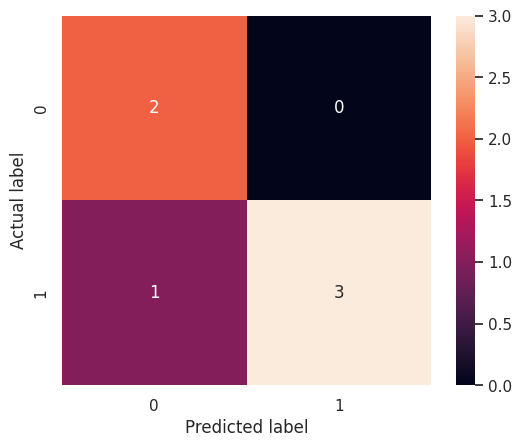

In [4]:
# We can make it prettier with Seaborn
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

sns.heatmap(mat, square=True, annot=True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

In the above we can see:
- True Positives (TP) =  3
- False Positives (FP) = 0
- True Negatives (TN) = 2
- False Negatives (FN) = 1  

Accuracy = (TP+TN) / (TP+TN+FP+FN)

Sometimes measuring accuracy alone can give us to much confidence in our predictive models.  If we have imbalanced data such that 1000 values are labeled `A` and 5 are labeled `B`, then a simple prediction of all `A`'s would give us unreasonably high confidence in the success of our model.

In predictive analytic classification models we tend to use the F1 Score or the ROC area under the curve instead.

These metrics account for imbalanced data better because they measure each of the above classification categories against each other in ways that take imbalanced data into account.

### Using the classification report to understand predictive success

In [5]:
from sklearn.metrics import classification_report

y_true = [0, 1, 1, 1, 0]
y_pred = [0, 0, 1, 1, 0]

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
tn, fp, fn, tp

target_names = ['class 0', 'class 1']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.67      1.00      0.80         2
     class 1       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



- **Precision**
  - Precision = TP / (TP+FP)
  - Intuitively, Precision is the ability of the classifier to not mistakenly label a negative sample as positive.
  - If we want to minimize false positives then we want Precision to be closer to 1.
  - Also sometimes referred to as *Positive Predictive Value*.

- **Recall**
  - Recall = TP / (TP+FN)
  - Intuitively, Recall is the ability of the classifier to find all of the positive samples.
  - If we want to minimize false negatives, we want Recall to be closer to 1.
  - Also sometimes referred to as *Sensitivity*.

- **F1 Score**
  - F1 = 2 * (Precision * Recall) / (Precision + Recall)
  - The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
  - The relative contribution of precision and recall to the F1 score are equal.
  - If both precesion and recall are high, then F1 is high. But if one or both are low, then F1 reacts to the signal and drops a lot.
  - ***F1 score is well-balanced, commonly used, and should be your default scoring method for classification moving forward.***

### ROC Area Under the Curve (AUC)

When using a classifier like Logistic Regression, we use some probability threshold to predict which observations belong to which class (above that value is one class, below it is the other). The default is 0.5, but we can set the threshold ourselves.

ROC is a plot of the True Positive Rate (y-axis) vs. the False Positive Rate (x-axis) for every possible classification threshold.

- TPR = TP / (TP+FN)

- FPR = FP / (FP+TN)

We treat the FPR as X and TPR as Y to plot points at a large range of threshold values along the x-axis. The area under the curve (AUC) is the calculated using calculus. A score of 1 means perfect prediction.  

Unlike Accuracy, ROC AUC accounts for imbalanced data by testing against many different threshold definitions.

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/3/36/ROC_space-2.png/800px-ROC_space-2.png "AUC")


In [18]:
# Calculating ROC AUC is simple with sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import roc_auc_score

y_true = [0, 1, 1, 1, 0]
y_pred = [0, 0, 1, 1, 0]

print(f'Accuracy Score: {accuracy_score(y_true, y_pred)}')
print(f'ROC AUC: {roc_auc_score(y_true, y_pred)}') #y_pred can be probabilities as well

Accuracy Score: 0.8
ROC AUC: 0.8333333333333333


### Defining your scoring strategy from metric functions

Some scoring metrics are built in to `cross_val_score` and `gridsearchCV`.

Others require you to build them before they can be used.

In [8]:
# Default set of scorers
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid = GridSearchCV(LogisticRegression(), param_grid={'C': [1, 10]}, scoring="f1_score")

# Custom built scorer
from sklearn.metrics import log_loss, make_scorer
log_loss_scorer = make_scorer(log_loss)
grid = GridSearchCV(LogisticRegression(), param_grid={'C': [1, 10]}, scoring=log_loss_scorer)

---
## **Part 2:** Metrics for Regression models

- **R-squared**
  - As we learned during linear regression, `R-squared = 1-(RSS/TSS)` where RSS and TSS are the Residual Sum of Squares & Total Sum of Squares.
  - R-squared tends to go down as you add more features no matter what they are. Adjusted R-squared is a metric that tries to correct this issue, but both still don't do well with small numbers of observations.

In [19]:
from sklearn.metrics import r2_score
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
r2_score(y_true, y_pred)

0.9486081370449679

- **Mean Squared Error**
  - MSE = RSS / (number of observations)
  - ***MSE is commonly used and should be your default scoring metric for regression moving forward.***

In [20]:
from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_squared_error(y_true, y_pred)

0.375

- **Root Mean Squared Error**
  - Take the square root of MSE.
  - A bit more robust to outliers than MSE

- **Mean Absolute Error**
  - Sum of `abs(yi - yhat)` divided by the number of observations.
  - Similar to MSE, but using absolute value of residuals instead of squaring them.

In [21]:
from sklearn.metrics import mean_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_absolute_error(y_true, y_pred)

0.5

- **Median Absolute Error**
  - Calculate `abs(yi - yhat)` for all observations and take the median value.
  - Robust to outliers in data.

In [22]:
from sklearn.metrics import median_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
median_absolute_error(y_true, y_pred)

0.5

---
## **Extra Practice:** Can you evaluate the Boston housing dataset using new regression metrics?

In [23]:
import pandas as pd
data_url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
data = pd.read_csv(data_url)
target=data["medv"]
data=data.drop(['medv'], axis=1)